In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
t_df = pd.read_csv('../impacts_research_data/ACSST1Y2023.S0802-2024-10-18T052440.csv')

### Cleaning

In [3]:
t_df['Label (Grouping)'][2:8]

2               16 to 19 years
3               20 to 24 years
4               25 to 44 years
5               45 to 54 years
6               55 to 59 years
7            60 years and over
Name: Label (Grouping), dtype: object

In [4]:
t_df.columns

Index(['Label (Grouping)', 'Imperial County, California!!Total!!Estimate',
       'Imperial County, California!!Total!!Margin of Error',
       'Imperial County, California!!Car, truck, or van -- drove alone!!Estimate',
       'Imperial County, California!!Car, truck, or van -- drove alone!!Margin of Error',
       'Imperial County, California!!Car, truck, or van -- carpooled!!Estimate',
       'Imperial County, California!!Car, truck, or van -- carpooled!!Margin of Error',
       'Imperial County, California!!Public transportation (excluding taxicab)!!Estimate',
       'Imperial County, California!!Public transportation (excluding taxicab)!!Margin of Error',
       'Imperial County, California!!Worked from home!!Estimate',
       'Imperial County, California!!Worked from home!!Margin of Error'],
      dtype='object')

In [5]:
def clean_int(input_str):
    return int("".join(input_str.split(',')))

def clean_percent(input_str):
    return int("".join(input_str[0:-1].split('.')))/10.0

def clean_percent_moe(input_str):
    return int("".join(input_str[1:].split('.')))/10.0

def clean_moe(input_str):
    return clean_int(input_str[1:])

In [6]:
# going to be looking at the following things:
# - how many people drove a car/truck/van alone
# - how many people carpool to work
# - how many people use public transport to get around
# - this data in the form of a distribution of ages

In [7]:
filtered_df = t_df.iloc[[0] + list(range(2, 9)), [0, 3, 5, 7]].reset_index(drop=True)

In [8]:
filtered_df

,Label (Grouping),"Imperial County, California!!Car, truck, or van -- drove alone!!Estimate","Imperial County, California!!Car, truck, or van -- carpooled!!Estimate","Imperial County, California!!Public transportation (excluding taxicab)!!Estimate"
0,Workers 16 years and over,"49,397","6,213",0
1,16 to 19 years,3.0%,1.8%,-
2,20 to 24 years,9.2%,12.3%,-
3,25 to 44 years,47.6%,48.9%,-
4,45 to 54 years,20.5%,15.5%,-
5,55 to 59 years,9.9%,7.4%,-
6,60 years and over,9.8%,14.0%,-
7,Median age (years),40.8,41.8,-


In [9]:
for col_name in filtered_df.columns:
    filtered_df[col_name] = filtered_df[col_name].str.strip()

In [10]:
def clean_label(label):
    if 'and over' in label:
        label = label.split(" ")
        return label[0] + "+"
    else:
        label = label.split(" ")
        return label[0] + "-" + label[2]

In [11]:
filtered_df.columns = ['group', 'car/truck/van', 'carpool', 'public transport']

In [12]:
filtered_df['group'][1:] = filtered_df['group'][1:].apply(clean_label)
filtered_df['car/truck/van'][1:] = filtered_df['car/truck/van'][1:].apply(clean_percent)
filtered_df['carpool'][1:] = filtered_df['carpool'][1:].apply(clean_percent)

In [13]:
filtered_df['car/truck/van'].iloc[0] = clean_int(filtered_df['car/truck/van'][0])
filtered_df['carpool'].iloc[0] = clean_int(filtered_df['carpool'][0])

In [14]:
filtered_df['car/truck/van'][1:] = filtered_df['car/truck/van'][1:].apply(
    lambda x: (float(x)/100.0) * filtered_df.iloc[0, 1]
    )
filtered_df['carpool'][1:] = filtered_df['carpool'][1:].apply(
    lambda x: (float(x)/100.0) * filtered_df.iloc[0, 1]
    )
filtered_df['public transport'] = filtered_df['public transport'].apply(lambda x: 0) # no public transport


In [15]:
filtered_df

,group,car/truck/van,carpool,public transport
0,Workers 16 years and over,49397,6213,0
1,16-19,1481.91,889.146,0
2,20-24,4544.524,6075.831,0
3,25-44,23512.972,24155.133,0
4,45-54,10126.385,7656.535,0
5,55-59,4890.303,3655.378,0
6,60+,4840.906,6915.58,0
7,Median-(years),1975.88,2025.277,0


In [16]:
cleaned_t_df = filtered_df.copy(deep=True)

In [18]:
# cleaned_t_df.to_csv('cleaned_transport.csv')

In [22]:
plt.style.use('fivethirtyeight')

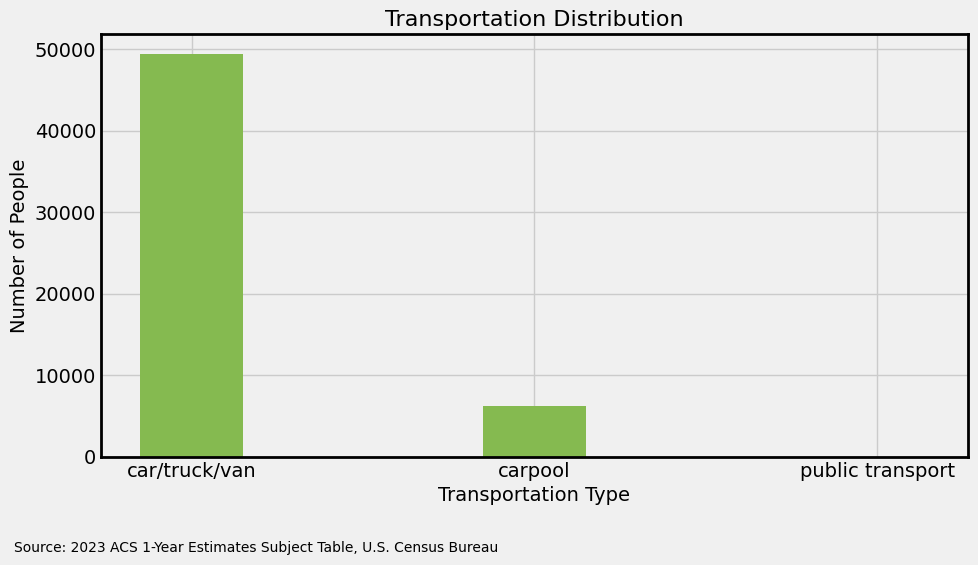

In [28]:
type = cleaned_t_df.columns[1:]
num_people = cleaned_t_df.iloc[0, 1:]
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(type, num_people, color = '#85ba50', width=0.3)

plt.title('Transportation Distribution', fontsize=16)
plt.ylabel('Number of People', fontsize=14)

plt.xlabel('Transportation Type', fontsize=14)

# plt.xticks(rotation=45, ha='right')

for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

plt.text(-0.1, -0.2, 'Source: 2023 ACS 1-Year Estimates Subject Table, U.S. Census Bureau', 
         transform=ax.transAxes, fontsize=10, va='top', ha='left')

plt.tight_layout()
plt.show()